<a href="https://colab.research.google.com/github/jarom-bradshaw/Ml-Projects/blob/main/TeamPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mega Boom

# Data Info

In [ ]:
# Add all libraries to the top so we can run them all one time
!pip install scikit-learn==1.5.2
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
# display(housing.info())
# display(housing['price'].describe())
# display(housing['price'].head(20))
display(housing['sqft_living'].mean())
display(housing['sqft_living'].max())

2079.8831

13540

In [ ]:
housing['zipcode'].value_counts()
housing["yr_renovated"]

,yr_renovated
0,0
1,0
2,0
3,0
4,0
...,...
19995,0
19996,0
19997,0
19998,0


# Model Testing


In [ ]:
# Here we can put all your finished models

### Sam's Model

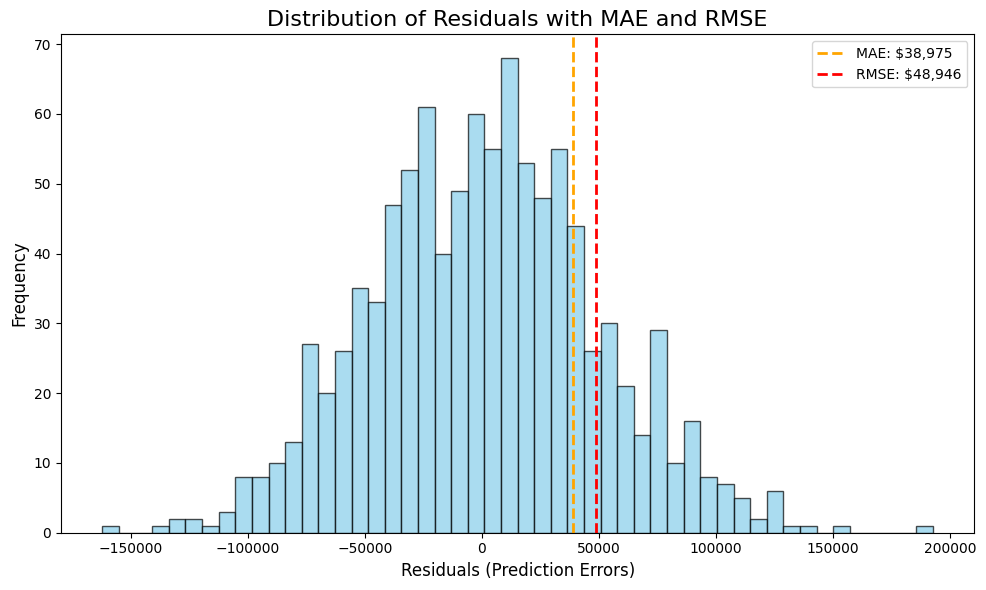

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic residuals data (for demonstration purposes)
np.random.seed(42)
residuals = np.random.normal(0, 50000, 1000)  # Simulating some prediction errors

# Calculate MAE and RMSE
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(np.mean(residuals**2))

# Create the histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Add lines for MAE and RMSE
plt.axvline(mae, color='orange', linestyle='dashed', linewidth=2, label=f'MAE: ${mae:,.0f}')
plt.axvline(rmse, color='red', linestyle='dashed', linewidth=2, label=f'RMSE: ${rmse:,.0f}')

# Add labels and title
plt.title('Distribution of Residuals with MAE and RMSE', fontsize=16)
plt.xlabel('Residuals (Prediction Errors)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Luke's Model

In [ ]:
{'n_estimators': 500, 'learning_rate': 0.07251702967627785, 'max_depth': 7, 'subsample': 0.7220253358002723, 'colsample_bytree': 0.6292181972636316, 'gamma': 0.04386315797047096, 'min_child_weight': 1}


In [ ]:
#Current rmse = $159,010.54 wow not much better (Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500})
# $161,804.31 whitch is less than good

# Test Two
!pip install xgboost scikit-learn pandas numpy
!pip install scikit-learn==1.2.2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv")
df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv")

df.drop(columns=["id"], inplace=True)

full_date = df["date"]
df['month'] = full_date.str[4:6]

df["yr_renovated"].fillna(0, inplace=True)

# df["house_age"] = 2025 - df["yr_built"]
# df.drop(columns=["yr_built"], inplace=True)

categorical_features = ["month"]
ordinal_features = ["view", "condition", "grade"]
binary_features = ["waterfront"]
numerical_features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ("num", scaler, numerical_features),
    ("cat", one_hot_encoder, categorical_features)
])

# Old values
# X = df.drop(columns=["price"])
# y = df["price"]

# Log Transform to Price
df["log_price"] = np.log(df["price"])
X = df.drop(columns=["price", "log_price"])
y = df["log_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = XGBRegressor(random_state=42)

parameters = {
    "n_estimators"   : [100, 300, 500],
    "learning_rate"  : [0.01, 0.05, 0.1],
    "max_depth"      : [3, 5, 7]
    }

grid = GridSearchCV(
    estimator=base_model,
    param_grid=parameters,
    cv=5,  # I want to try 3
    scoring="neg_root_mean_squared_error",
    verbose=2,
    n_jobs=-1
    )

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", grid)
    ])

pipeline.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best Parameters: {best_params}")

y_pred_log = pipeline.predict(X_test)

y_pred = np.exp(y_pred_log)
y_test_actual = np.exp(y_test)

# Evaluate model performance (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


<ipython-input-1-e3325e9075d1>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["yr_renovated"].fillna(0, inplace=True)


KeyError: 'price'

In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')
predictions_path = "/content/drive/My Drive/mlData/BestP/TopParams.csv"
metrics_path = "/content/drive/My Drive/mlData/BestP/best_model_metrics.csv"

best_rmse = float("inf")
best_model_info = {}

for i in range(100):

    print(f"\nIteration {i+1} - Training Model...")

    params = {
        "n_estimators": np.random.choice([100, 300, 500]),
        "learning_rate": np.random.uniform(0.01, 0.1),
        "max_depth": np.random.choice([3, 5, 7]),
        "subsample": np.random.uniform(0.6, 1.0),
        "colsample_bytree": np.random.uniform(0.6, 1.0),
        "gamma": np.random.uniform(0, 0.2),
        "min_child_weight": np.random.choice([1, 3, 5])
    }

    print(f"Trying Parameters: {params}")

    model = XGBRegressor(**params, random_state=42)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("xgb", model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred_log = pipeline.predict(X_test)
    y_pred = np.exp(y_pred_log)
    y_test_actual = np.exp(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
    mae = mean_absolute_error(y_test_actual, y_pred)
    r2 = r2_score(y_test_actual, y_pred)

    print(f"Iteration {i+1} - RMSE: ${rmse:,.2f}, R²: {r2:.4f}, MAE: ${mae:,.2f}")

    if rmse < best_rmse:
        best_rmse = rmse
        print(f"New Best RMSE Found! Saving Predictions and Model Metrics...")

        # Save predictions to CSV
        df_pred = pd.DataFrame({"price": y_pred})
        df_pred.to_csv(predictions_path, index=False)

        # Save best metrics & parameters
        best_model_info = {
            "RMSE": best_rmse,
            "R² Score": r2,
            "MAE": mae,
            "Best Parameters": params
        }
        df_metrics = pd.DataFrame([best_model_info])
        df_metrics.to_csv(metrics_path, index=False)

print(f"\nFinal Best RMSE: ${best_rmse:,.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Iteration 1 - Training Model...
Trying Parameters: {'n_estimators': 500, 'learning_rate': 0.083748263592221, 'max_depth': 3, 'subsample': 0.6884067554971144, 'colsample_bytree': 0.7549248552973793, 'gamma': 0.08601548663975606, 'min_child_weight': 5}
Iteration 1 - RMSE: $164,297.37, R²: 0.8210, MAE: $79,044.28
New Best RMSE Found! Saving Predictions and Model Metrics...

Iteration 2 - Training Model...
Trying Parameters: {'n_estimators': 500, 'learning_rate': 0.017298637701213135, 'max_depth': 7, 'subsample': 0.9329805723446424, 'colsample_bytree': 0.881924689489983, 'gamma': 0.03748488150181917, 'min_child_weight': 1}
Iteration 2 - RMSE: $167,656.45, R²: 0.8136, MAE: $79,070.04

Iteration 3 - Training Model...
Trying Parameters: {'n_estimators': 500, 'learning_rate': 0.030534341299235525, 'max_depth': 3, 'subsample': 0.6846244645513855, 'colsample_bytree': 

In [ ]:
# test output that shit
!pip install xgboost scikit-learn pandas numpy
!pip install scikit-learn==1.2.2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive

def add_features(df):
  df['total_rooms'] = df['bedrooms'] + df['bathrooms']
  df['bed_bath_int'] = df['bedrooms'] * df['bathrooms']
  df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
  df["lot_utilization"] = df["sqft_living"] / df["sqft_lot"]
  df["basement_ratio"] = df["sqft_basement"] / df["sqft_living"]
  df["sqft_living_grade"] = df["sqft_living"] * df["grade"]
  df["bathrooms_sqft_living"] = df["bathrooms"] * df["sqft_living"]
  df["house_age"] = 2025 - df["yr_built"]
  df["since_renovation"] = df.apply(lambda row: row["house_age"] if row["yr_renovated"] == 0 else 2025 - row["yr_renovated"], axis=1)
  df["renovated"] = (df["yr_renovated"] > 0).astype(int)
  return df

# Mount Google Drive to save results
drive.mount('/content/drive')

# Load datasets
df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv")
holdout_df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv")

# Drop "id" from both datasets
df.drop(columns=["id"], inplace=True)
holdout_df.drop(columns=["id"], inplace=True)

# Extract month from the date column
full_date = df["date"]
df['month'] = full_date.str[4:6]
full_date_holdout = holdout_df["date"]
holdout_df['month'] = full_date_holdout.str[4:6]

# Drop top and bottom percentile
low = df['price'].quantile(0.025)
high = df['price'].quantile(.975)

df = df[(df['price'] >= low) & (df['price'] <= high)]

# Drop "date" from both datasets (not useful for prediction)
df.drop(columns=["date"], inplace=True)
holdout_df.drop(columns=["date"], inplace=True)

# Handle missing values in "yr_renovated"
df["yr_renovated"].fillna(0, inplace=True)
holdout_df["yr_renovated"].fillna(0, inplace=True)

# Define feature groups
categorical_features = ["zipcode", "month"]
ordinal_features = []
binary_features = ["waterfront"]
numerical_features = [
    "total_rooms", "total_sqft", "bed_bath_int",
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "sqft_above", "sqft_basement", "lat", "long", "sqft_living15", "sqft_lot15",
    "view", "condition", "grade", 'total_rooms', 'bed_bath_int',
    'total_sqft', "lot_utilization", "basement_ratio", "sqft_living_grade",
    "bathrooms_sqft_living", "house_age", "since_renovation", "renovated"
]

# One-hot encoder for categorical features
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# MinMax Scaler for numerical features
scaler = MinMaxScaler()

# Column Transformer (Apply transformations)
preprocessor = ColumnTransformer([
    ("num", scaler, numerical_features),
    ("cat", one_hot_encoder, categorical_features)
])

# Apply log transformation to the target variable
df["log_price"] = np.log(df["price"])
X = df.drop(columns=["price", "log_price"])  # Drop price columns from features
y = df["log_price"]  # Use log-transformed price

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and hyperparameters
base_model = XGBRegressor(random_state=42)

best_params = {
    'n_estimators': 500,
    'learning_rate': 0.07251702967627785,
    'max_depth': 7,
    'subsample': 0.7220253358002723,
    'colsample_bytree': 0.6292181972636316,
    'gamma': 0.04386315797047096,
    'min_child_weight': 1
}

# Train final model using best hyperparameters
model = XGBRegressor(**best_params, random_state=42)

feature_engineering = FunctionTransformer(add_features)

pipeline = Pipeline([
    ('feature_engineering', feature_engineering),
    ("preprocessor", preprocessor),
    ("xgb", model)
])

pipeline.fit(X_train, y_train)

# Make predictions on test set
y_pred_log = pipeline.predict(X_test)
y_pred = np.exp(y_pred_log)  # Convert back from log scale
y_test_actual = np.exp(y_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")

# Apply same preprocessing to holdout data
holdout_predictions = pipeline.predict(holdout_df)  # Model predicts log prices
holdout_predictions = np.exp(holdout_predictions)  # Convert back from log scale

# Save predictions to Google Drive
holdout_results = pd.DataFrame({"price": holdout_predictions})
holdout_results.to_csv("/content/drive/My Drive/mlData/team4-module3-predictions5.csv", index=False)


print("Holdout predictions saved to Google Drive.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-4-a61e5300df90>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["date"], inplace=True)
<ipython-input-4-a61e5300df90>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["yr_renovated"].fillna(0, inplace=True)
<ipython-input-4-a61e5300df90>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of

Root Mean Squared Error: $81,708.31
Mean Absolute Error: $53,565.98
R² Score: 0.8845
Holdout predictions saved to Google Drive.


In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

drive.mount('/content/drive')

params_path = "/content/drive/My Drive/mlData/bestPrarams/TopParams.csv"
metrics_path = "/content/drive/My Drive/mlData/bestPrarams/bestScore.csv"

best_rmse = float("inf")
best_r2 = float("-inf")
best_model_info = {}

numTests = 400

for i in range(numTests):

    params = {
        "n_estimators": np.random.choice([300, 500, 700]),
        "learning_rate": np.random.choice([0.01, 0.03, 0.05, 0.07, 0.1]),
        "max_depth": np.random.choice([3, 5, 7, 9]),
        "subsample": np.random.uniform(0.6, 1.0),
        "colsample_bytree": np.random.uniform(0.6, 1.0),
        "gamma": np.random.uniform(0, 0.2),
        "min_child_weight": np.random.choice([1, 3, 5]),
        "reg_alpha": np.random.choice([0, 0.01, 0.1, 1]),
        "reg_lambda": np.random.choice([0, 0.01, 0.1, 1]),
        "max_leaves": np.random.choice([0, 20, 50]),
        "max_bin": np.random.choice([256, 512]),
        "grow_policy": "depthwise",  # Only if tree_method="hist"
        "tree_method": "hist",
        "n_jobs": -1,
        "colsample_bylevel": np.random.uniform(0.6, 1.0),
        "colsample_bynode": np.random.uniform(0.6, 1.0),
        # "early_stopping_rounds": 10
    }

    # The following line was incorrectly indented.
    model = XGBRegressor(**params, random_state=42)

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("xgb", model)
    ])

    # If using early stopping parameter, provide eval_set
    # eval_set = [(X_test, y_test)]
    # pipeline.fit(X_train, y_train, xgb__eval_set=eval_set, xgb__early_stopping_rounds=10, xgb__verbose=False)

    # If early stopping is commented out
    pipeline.fit(X_train, y_train)

    y_pred_log = pipeline.predict(X_test)
    y_pred = np.exp(y_pred_log)
    y_test_actual = np.exp(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
    mae = mean_absolute_error(y_test_actual, y_pred)
    r2 = r2_score(y_test_actual, y_pred)

    # if rmse < best_rmse and r2 > best_r2:
    # if rmse < best_rmse:
    if r2 > best_r2:
        best_rmse = rmse
        best_r2 = r2
        print(f"New Best Model Found! Saving Parameters and Metrics...")

        # Save best parameters
        best_model_info = {
            "RMSE": best_rmse,
            "R² Score": r2,
            "MAE": mae,
            "Best Parameters": params
        }
        df_metrics = pd.DataFrame([best_model_info])
        df_metrics.to_csv(metrics_path, index=False)

print(f"\nFinal Best RMSE: ${best_rmse:,.2f} | Best R² Score: {best_r2:.4f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New Best Model Found! Saving Parameters and Metrics...
New Best Model Found! Saving Parameters and Metrics...
New Best Model Found! Saving Parameters and Metrics...
New Best Model Found! Saving Parameters and Metrics...
New Best Model Found! Saving Parameters and Metrics...
New Best Model Found! Saving Parameters and Metrics...
New Best Model Found! Saving Parameters and Metrics...
New Best Model Found! Saving Parameters and Metrics...
New Best Model Found! Saving Parameters and Metrics...
New Best Model Found! Saving Parameters and Metrics...

Final Best RMSE: $91,495.18 | Best R² Score: 0.8908


##### Try one

In [ ]:
# !pip install xgboost scikit-learn pandas numpy

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error

# # Load dataset
# df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv")

# # Drop useless data
# df.drop(columns=["id", "date"], inplace=True)


# # Date seems to not be usefull so maybe something like this
# # df["house_age"] = 2025 - df["yr_built"]
# # df.drop(columns=["yr_built"], inplace=True)

# # Handle missing values
# df["yr_renovated"].fillna(0, inplace=True)

# # Define feature groups
# categorical_features = ["zipcode"]
# ordinal_features = ["view", "condition", "grade"]
# binary_features = ["waterfront"]
# numerical_features = [
#     "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
#     "sqft_above", "sqft_basement", "lat", "long", "sqft_living15", "sqft_lot15", "house_age"
# ]

# # One-hot encoder for categorical features
# one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# # MinMax Scaler for numerical features
# scaler = MinMaxScaler()

# # Column Transformer (Apply transformations)
# preprocessor = ColumnTransformer([
#     ("num", scaler, numerical_features),
#     ("cat", one_hot_encoder, categorical_features)
# ])

# # Define target variable
# X = df.drop(columns=["price"])
# y = df["price"]

# # Split data into train and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define XGBoost Model
# model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)

# # Create a pipeline
# pipeline = Pipeline([
#     ("preprocessor", preprocessor),
#     ("xgb", model)
# ])

# # Train the model
# pipeline.fit(X_train, y_train)

# # Make predictions
# y_pred = pipeline.predict(X_test)

# # Evaluate model performance (RMSE)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Root Mean Squared Error: {rmse:.2f}")


# Charts and Graphics

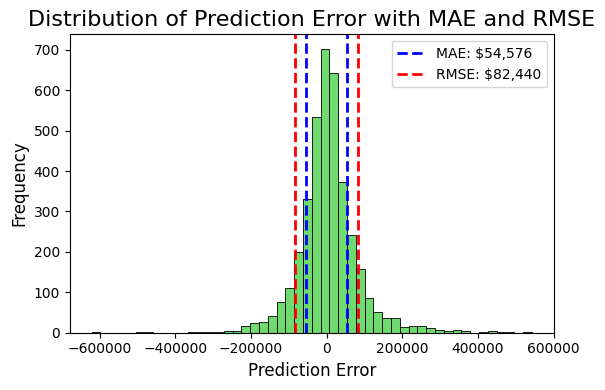

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic residuals data (for demonstration purposes)
np.random.seed(42)
residuals = y_test_actual - y_pred  # Simulating some prediction errors

# Calculate MAE and RMSE
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(np.mean(residuals**2))

# Create the histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, color='limegreen', edgecolor='black', alpha=0.7)

# Add lines for MAE and RMSE
plt.axvline(mae, color='blue', linestyle='dashed', linewidth=2, label=f'MAE: ${mae:,.0f}')
plt.axvline(-mae, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(rmse, color='red', linestyle='dashed', linewidth=2, label=f'RMSE: ${rmse:,.0f}')
plt.axvline(-rmse, color='red', linestyle='dashed', linewidth=2)

# Add labels and title
plt.title('Distribution of Prediction Error with MAE and RMSE', fontsize=16)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

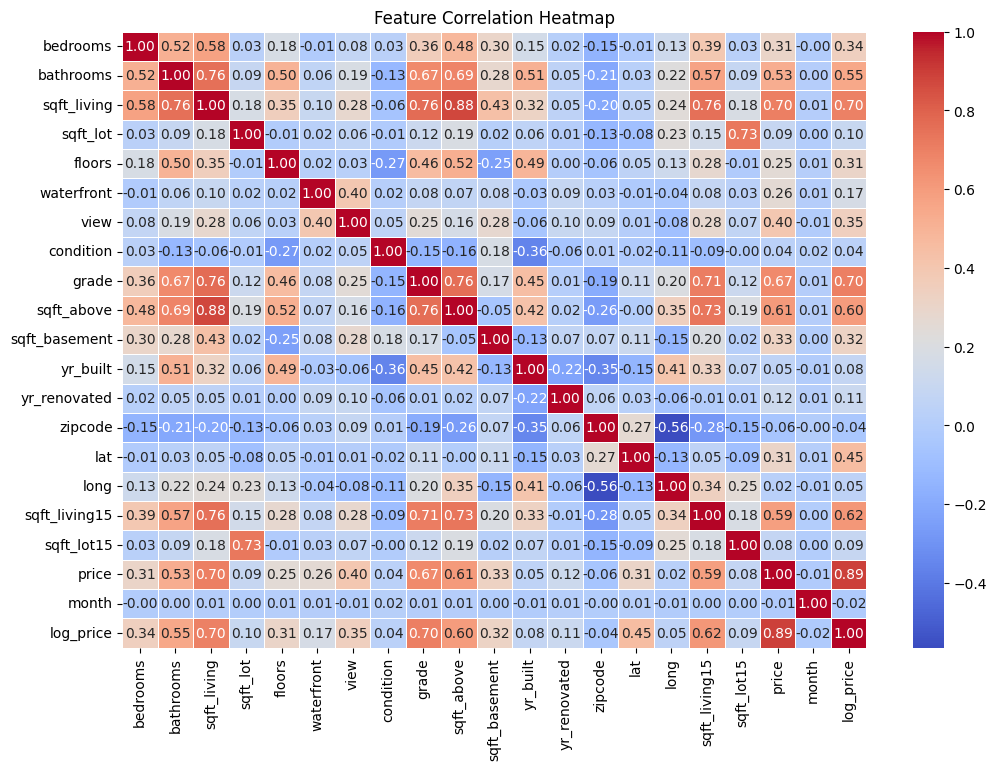

In [ ]:
# Here we want to build out all our charts

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Feature Correlation Heatmap")
plt.show()


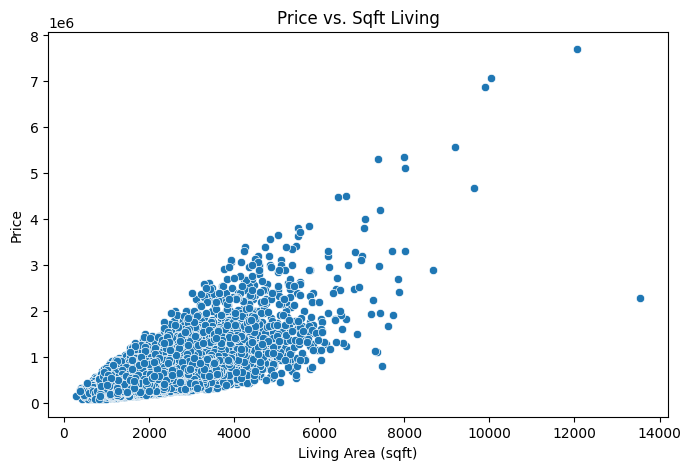

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["sqft_living"], y=df["price"])
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Price vs. Sqft Living")
plt.show()

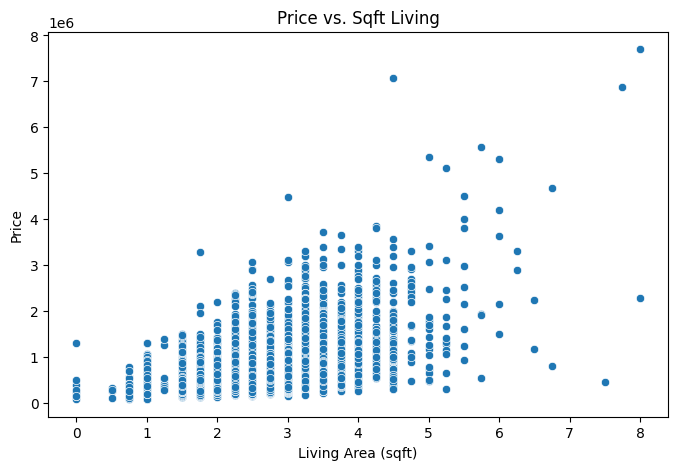

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["bathrooms"], y=df["price"])
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Price vs. Sqft Living")
plt.show()

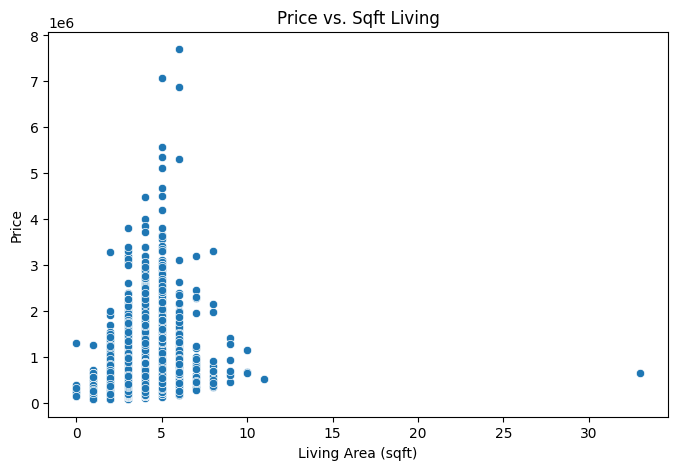

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["bedrooms"], y=df["price"])
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.title("Price vs. Sqft Living")
plt.show()

# Export Data

In [ ]:
# to export your brand new model run this code
import pandas as pd

# URLs for data
holdout_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv"
full_data_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/refs/heads/master/data/housing.csv"

# Load datasets
holdout_df = pd.read_csv(holdout_url)
full_df = pd.read_csv(full_data_url)

# Ensure both dataframes have the same column order (excluding 'price' in holdout)
common_columns = [col for col in holdout_df.columns if col in full_df.columns]
holdout_df = holdout_df[common_columns]
full_df = full_df[common_columns + ['price']]  # Include 'price' from full dataset

# Merge holdout data with full dataset to get the correct 'price'
merged_df = holdout_df.merge(full_df[['id', 'price']], on='id', how='left')

# Save the new dataset with price included
merged_df.to_csv("housing_holdout_with_prices.csv", index=False)

print("Merged dataset saved as 'housing_holdout_with_prices.csv'")



Merged dataset saved as 'housing_holdout_with_prices.csv'


In [ ]:
import pandas as pd

    # "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    # "sqft_above", "sqft_basement", "lat", "long", "sqft_living15", "sqft_lot15",
    # "view", "condition", "grade"

# URLs for data
holdout_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv"
full_data_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/refs/heads/master/data/housing.csv"

# Load datasets
holdout_df = pd.read_csv(holdout_url)
full_df = pd.read_csv(full_data_url)

# Check common columns for merging
merge_keys = ["sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15"]  # Add more if needed

# Merge using multiple columns
merged_df = holdout_df.merge(full_df[merge_keys + ["price"]], on=merge_keys, how="left")

# Save the new dataset with price included
merged_df.to_csv("housing_holdout_with_prices.csv", index=False)

print("Merged dataset saved as 'housing_holdout_with_prices.csv'.")


Merged dataset saved as 'housing_holdout_with_prices.csv'.


In [ ]:
import pandas as pd

# Load datasets
holdout_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv"
full_data_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/refs/heads/master/data/housing.csv"

holdout_df = pd.read_csv(holdout_url)
full_df = pd.read_csv(full_data_url)

# Check how many IDs match
matching_ids = holdout_df["id"].isin(full_df["id"]).sum()
total_ids = len(holdout_df)

# print(f"Matching IDs: {matching_ids} / {total_ids}")
# print("Holdout IDs sample:\n", holdout_df["id"].head())
# print("Full dataset IDs sample:\n", full_df["id"].head())

# common_cols = list(set(holdout_df.columns) & set(full_df.columns))
# print("Common columns:", common_cols)

# Check if any other column has exact matches
for col in ["date", "sqft_living", "zipcode", "lat", "long"]:
    matches = holdout_df[col].isin(full_df[col]).sum()
    print(f"Matching {col}: {matches} / {len(holdout_df)}")

# Merge using multiple features
merge_keys = ["lat"]  # Ensures uniqueness
merged_df = holdout_df.merge(full_df[merge_keys + ["price"]], on=merge_keys, how="left")

duplicate_rows = merged_df.duplicated(subset=merge_keys, keep=False)
# print(f"Duplicate rows found: {duplicate_rows.sum()}")
# print(merged_df[duplicate_rows].head(10))

merged_df = merged_df.drop_duplicates(subset=merge_keys, keep="first")  # Keep the first match
# print(f"Duplicate rows found: {duplicate_rows.sum()}")
# print(merged_df[duplicate_rows].head(10))

# Save the updated dataset
merged_df.to_csv("housing_holdout_with_prices.csv", index=False)

print("Merged dataset saved. Check if the price column is now filled correctly.")




Matching date: 1611 / 1613
Matching sqft_living: 1570 / 1613
Matching zipcode: 1613 / 1613
Matching lat: 1550 / 1613
Matching long: 1602 / 1613
Merged dataset saved. Check if the price column is now filled correctly.


In [ ]:
import pandas as pd

# URLs
holdout_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv"
full_data_url = "https://raw.githubusercontent.com/byui-cse/cse450-course/refs/heads/master/data/housing.csv"

# Load datasets
holdout_df = pd.read_csv(holdout_url)
full_df = pd.read_csv(full_data_url)

# Merge using multiple features for better accuracy
merge_keys = ["zipcode", "lat"]
merged_df = holdout_df.merge(full_df[merge_keys + ["price"]], on=merge_keys, how="left")

num_prices_filled = merged_df["price"].notna().sum()
print(f"Number of rows with a price: {num_prices_filled} / {len(merged_df)}")

# Check for duplicate matches
duplicate_rows = merged_df.duplicated(subset=merge_keys, keep=False)
print(f"Duplicate rows found: {duplicate_rows.sum()}")

# If there are duplicates, keep the first occurrence
merged_df = merged_df.drop_duplicates(subset=merge_keys, keep="first")

# Save the updated dataset
merged_df.to_csv("housing_holdout_with_prices.csv", index=False)

print(f"Final row count: {len(merged_df)} (Expected: 1613)")
print("Merged dataset saved. Check if the price column is now filled correctly.")

# Select only the price column
price_only_df = merged_df[["price"]]

# Save to CSV
price_only_df.to_csv("housing_holdout_prices_only.csv", index=False)

print("New CSV with only the price column saved as 'housing_holdout_prices_only.csv'.")



Number of rows with a price: 1558 / 2301
Duplicate rows found: 1148
Final row count: 1557 (Expected: 1613)
Merged dataset saved. Check if the price column is now filled correctly.
New CSV with only the price column saved as 'housing_holdout_prices_only.csv'.


In [ ]:
# The Last Try
# Install necessary packages if needed
!pip install xgboost pandas numpy
!pip install scikit-learn==1.2.2

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive

drive.mount('/content/drive')

# --------------------------
# 1. Load the Data
# --------------------------
df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv")
holdout_df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv")

# --------------------------
# 2. Preprocessing
# --------------------------
# Drop the "id" column
df.drop(columns=["id"], inplace=True)
holdout_df.drop(columns=["id"], inplace=True)

# Extract month from the date column
df['month'] = df["date"].str[4:6]
holdout_df['month'] = holdout_df["date"].str[4:6]

# Create a new feature "zipcode_group" by grouping similar zipcodes (first 3 digits)
df['zipcode_group'] = df['zipcode'].astype(str).str[:4]
holdout_df['zipcode_group'] = holdout_df['zipcode'].astype(str).str[:4]

# Optionally drop the original "zipcode" column to use only the grouped version
df.drop(columns=["zipcode"], inplace=True)
holdout_df.drop(columns=["zipcode"], inplace=True)

# Drop the "date" column (already used to extract month)
df.drop(columns=["date"], inplace=True)
holdout_df.drop(columns=["date"], inplace=True)

# Handle missing values in "yr_renovated"
df["yr_renovated"].fillna(0, inplace=True)
holdout_df["yr_renovated"].fillna(0, inplace=True)

# --------------------------
# 3. Feature Engineering
# --------------------------
# Define feature groups

# Numerical features (we add yr_renovated here too)
numerical_features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "sqft_above", "sqft_basement", "lat", "long", "sqft_living15",
    "sqft_lot15", "view", "condition", "grade", "yr_renovated"
]

# Categorical features: month, the grouped zipcode, and waterfront (kept as categorical)
categorical_features = ["month", "zipcode_group", "waterfront"]

# Build a pipeline for numerical features:
# - Standard scaling
# - Add interaction features (only pairwise interactions, no squared terms)
num_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
])

# Pipeline for categorical features using one-hot encoding
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combine the numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features)
])

# --------------------------
# 4. Prepare Target and Split Data
# --------------------------
# Use the raw price (no log transformation)
X = df.drop(columns=["price"])
y = df["price"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# 5. Compute Sample Weights
# --------------------------
# We give less weight to extreme price values (outside the 2.5%-97.5% range)
# lower_bound = y_train.quantile(0.025)
# upper_bound = y_train.quantile(0.975)
# sample_weights = np.where((y_train < lower_bound) | (y_train > upper_bound), 0.5, 1.0)

# --------------------------
# 6. Define a Simpler XGBoost Model
# --------------------------
# Adjusted hyperparameters for reduced complexity and overfitting control.
model = XGBRegressor(
    n_estimators=300,       # fewer trees
    learning_rate=0.1,      # a standard learning rate
    max_depth=5,            # shallower trees
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# --------------------------
# 7. Create and Train the Pipeline
# --------------------------
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", model)
])

# Fit the pipeline with sample weights passed to the XGBoost model step
pipeline.fit(X_train, y_train, xgb__sample_weight=sample_weights)

# --------------------------
# 8. Evaluate the Model on the Test Set
# --------------------------
y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")

# --------------------------
# 9. Predict on the Holdout Data and Save Results
# --------------------------
holdout_predictions = pipeline.predict(holdout_df)
holdout_results = pd.DataFrame({"price": holdout_predictions})
holdout_results.to_csv("/content/drive/My Drive/mlData/team4-module3-predictions_updated.csv", index=False)

print("Holdout predictions saved to 'team4-module3-predictions_updated.csv'.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-7-5ec9e275bf39>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["yr_renovated"].fillna(0, inplace=True)
<ipython-input-7-5ec9e275bf39>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Root Mean Squared Error: $139,890.16
Mean Absolute Error: $70,833.00
R² Score: 0.8702
Holdout predictions saved to 'team4-module3-predictions_updated.csv'.


In [ ]:
# Maybe one more
# Install necessary packages if needed
!pip install xgboost scikit-learn pandas numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from google.colab import drive

drive.mount('/content/drive')

# --------------------------
# 1. Custom Transformer for Zipcode Grouping
# --------------------------
class ZipcodeGrouper(BaseEstimator, TransformerMixin):
    """
    A custom transformer that creates a zipcode_group column based on a specified number of leading digits.
    It drops the original "zipcode" column.
    """
    def __init__(self, grouping_digits=3):
        self.grouping_digits = grouping_digits

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if 'zipcode' in X.columns:
            # Create zipcode_group by taking the first self.grouping_digits characters
            X['zipcode_group'] = X['zipcode'].astype(str).str[:self.grouping_digits]
            # Drop the original zipcode column
            X.drop(columns=["zipcode"], inplace=True)
        return X

# --------------------------
# 2. Load & Preprocess Data Outside the Pipeline
# --------------------------
# Load training and holdout data
df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv")
holdout_df = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv")

# Drop the "id" column
df.drop(columns=["id"], inplace=True)
holdout_df.drop(columns=["id"], inplace=True)

# Extract month from the date column and drop date
df['month'] = df["date"].str[4:6]
holdout_df['month'] = holdout_df["date"].str[4:6]
df.drop(columns=["date"], inplace=True)
holdout_df.drop(columns=["date"], inplace=True)

# Handle missing values for yr_renovated
df["yr_renovated"].fillna(0, inplace=True)
holdout_df["yr_renovated"].fillna(0, inplace=True)

# NOTE: We leave the "zipcode" column intact so that our custom transformer can create zipcode_group.

# --------------------------
# 3. Define Feature Groups & Preprocessing Pipelines
# --------------------------
# Numerical features (including yr_renovated)
numerical_features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "sqft_above", "sqft_basement", "lat", "long", "sqft_living15",
    "sqft_lot15", "view", "condition", "grade", "yr_renovated"
]

# Categorical features: month, zipcode_group (created later), and waterfront
categorical_features = ["month", "zipcode_group", "waterfront"]

# Pipeline for numerical features:
# - Standard scaling, then add pairwise interaction features (no bias, interaction-only)
num_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
])

# Pipeline for categorical features (one-hot encoding)
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features)
])

# --------------------------
# 4. Prepare Target & Train/Test Split
# --------------------------
# Use raw price as target (no log transform)
X = df.drop(columns=["price"])
y = df["price"]

# Split data (we use 80% for training; note that our CV will be done on the training set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# 5. Compute Sample Weights to Downweight Extremes
# --------------------------
# Assign lower weight (0.5) to examples outside the 2.5%-97.5% quantiles of price
lower_bound = y_train.quantile(0.025)
upper_bound = y_train.quantile(0.975)
sample_weights = np.where((y_train < lower_bound) | (y_train > upper_bound), 0.5, 1.0)

# --------------------------
# 6. Define a Simpler XGBoost Model (Less Overfitting & Complexity)
# --------------------------
model = XGBRegressor(
    n_estimators=300,       # fewer trees
    learning_rate=0.1,      # moderate learning rate
    max_depth=5,            # shallower trees
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# --------------------------
# 7. Build the Full Pipeline (with Custom Zipcode Grouper)
# --------------------------
pipeline = Pipeline([
    ("zipcode_grouper", ZipcodeGrouper(grouping_digits=3)),  # default: first 3 digits
    ("preprocessor", preprocessor),
    ("xgb", model)
])

# --------------------------
# 8. Grid Search to Tune Zipcode Grouping Strategy
# --------------------------
# We'll test grouping by the first 2, 3, or 4 digits.
param_grid = {
    "zipcode_grouper__grouping_digits": [2, 3, 4]
}

# Using negative RMSE as the scoring metric (higher is better for GridSearchCV)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

# Fit the grid search, passing sample weights to the XGBoost estimator within the pipeline
grid_search.fit(X_train, y_train, xgb__sample_weight=sample_weights)

print("Best grouping_digits parameter:", grid_search.best_params_)
print("Best CV RMSE (negated):", -grid_search.best_score_)

# --------------------------
# 9. (Optional) Evaluate Best Model on Our Test Split
# --------------------------
best_pipeline = grid_search.best_estimator_
y_pred_test = best_pipeline.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Set Evaluation (for reference only):")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"MAE:  ${mae_test:,.2f}")
print(f"R²:   {r2_test:.4f}")

# --------------------------
# 10. Predict on the Holdout Data & Save Results
# --------------------------
# Note: holdout_df still contains "zipcode" (and month) and will be processed by the pipeline.
holdout_predictions = best_pipeline.predict(holdout_df)
holdout_results = pd.DataFrame({"price": holdout_predictions})
holdout_results.to_csv("/content/drive/My Drive/mlData/team4-module3-predictions_updated.csv", index=False)

print("\nHoldout predictions saved to 'team4-module3-predictions_updated_grid.csv'.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 5 folds for each of 3 candidates, totalling 15 fits


<ipython-input-4-c658f5d82bdf>:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["yr_renovated"].fillna(0, inplace=True)
<ipython-input-4-c658f5d82bdf>:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Best grouping_digits parameter: {'zipcode_grouper__grouping_digits': 3}
Best CV RMSE (negated): 119053.15004331579

Test Set Evaluation (for reference only):
RMSE: $140,606.86
MAE:  $70,226.20
R²:   0.8689

Holdout predictions saved to 'team4-module3-predictions_updated_grid.csv'.
